# Networks

- Notebook to exercise statistics distributions relevant for Turtles

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())
import numpy as np
import pandas as pd
import matplotlib

Last updated on  Wed May  6 11:44:45 2020


In [2]:
fontsize=20
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': fontsize,
        }

plt.rcParams["font.size"     ] = fontsize


In [3]:
from scipy.stats import gamma
from scipy.stats import nbinom
from scipy.stats import expon

In [105]:
from networkx import *

In [106]:
import networkx as nx

In [107]:
from turtleWorld.utils import PrtLvl, print_level, throw_dice


# Erdos-Renyi graph 

- The classic Erdos-Renyi network: Each of the possible N(N − 1)/2 links among the N edges is activated randomly with probability p. This is well understood mathematically. They are not scale free networks (the degree distribution is Poisson). They are small-world networks. They show a very small clustering coefficient.

In [96]:
er=nx.erdos_renyi_graph(100,0.1)

In [99]:
D = np.array([degree(er,n) for n in nodes(er)])
C= np.array([clustering(er,n) for n in nodes(er)])

In [100]:
np.mean(D)

10.08

(array([ 2.,  3., 14., 12., 14., 25.,  8., 16.,  2.,  4.]),
 array([ 3. ,  4.4,  5.8,  7.2,  8.6, 10. , 11.4, 12.8, 14.2, 15.6, 17. ]),
 <a list of 10 Patch objects>)

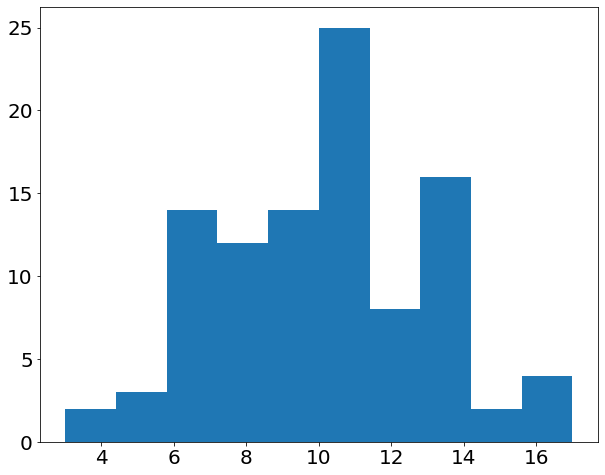

In [98]:
plt.hist(D)

(array([ 9., 11., 14., 14., 19., 11., 13.,  5.,  2.,  2.]),
 array([0.48357792, 0.48913317, 0.49468842, 0.50024367, 0.50579892,
        0.51135418, 0.51690943, 0.52246468, 0.52801993, 0.53357518,
        0.53913043]),
 <a list of 10 Patch objects>)

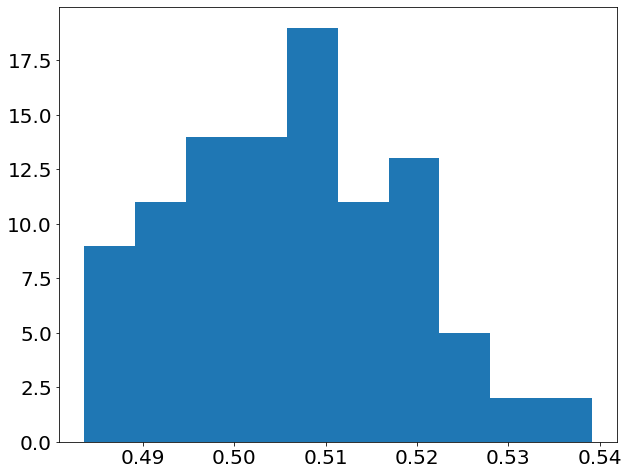

In [93]:
plt.hist(C)

(array([47.,  4.,  1.,  4.,  2.,  2.,  1.,  0.,  0.,  1.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

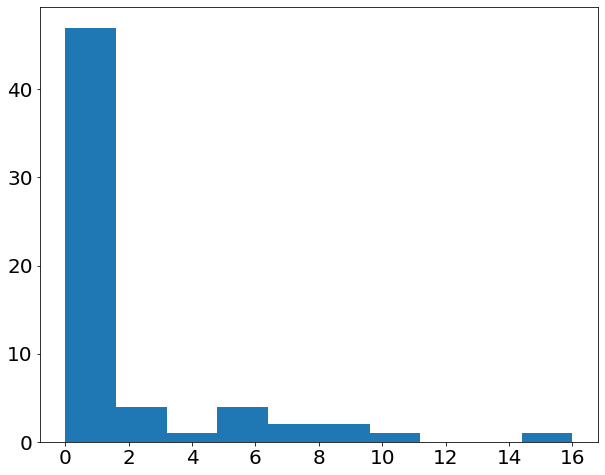

In [94]:
plt.hist(degree_histogram(er))

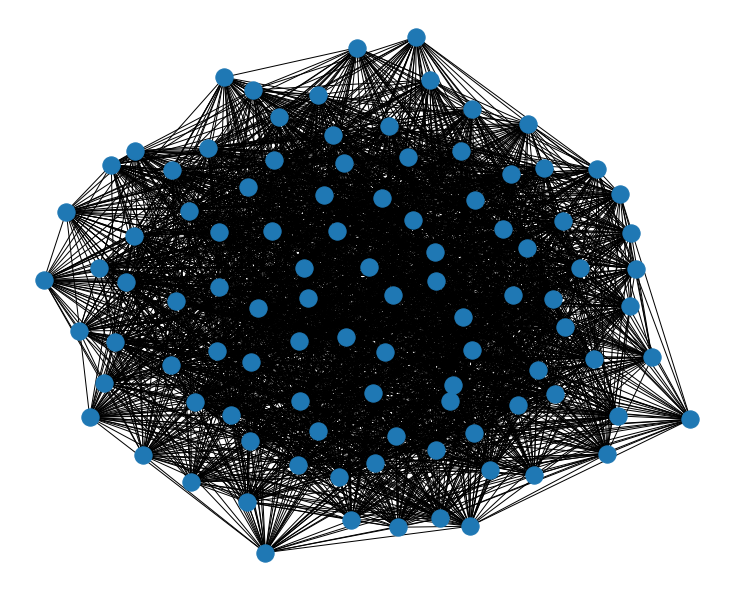

In [95]:
nx.draw(er)

In [45]:
def degree_and_clustering(g):
    D = [degree(g,n) for n in nodes(g)]
    C= [clustering(g,n) for n in nodes(g)]
    return D, C

# The Watts-Strogatz model 

- shows that the small world property can be present in graphs with high clustering coefficient (https://www.nature.com/articles/30918). Still the degree distribution is not power law in these models.

In [61]:
ws=nx.watts_strogatz_graph(30,10,0.1)
D, C = degree_and_clustering(ws)

(array([8., 0., 1., 2., 1., 0., 0., 0., 0., 1.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <a list of 10 Patch objects>)

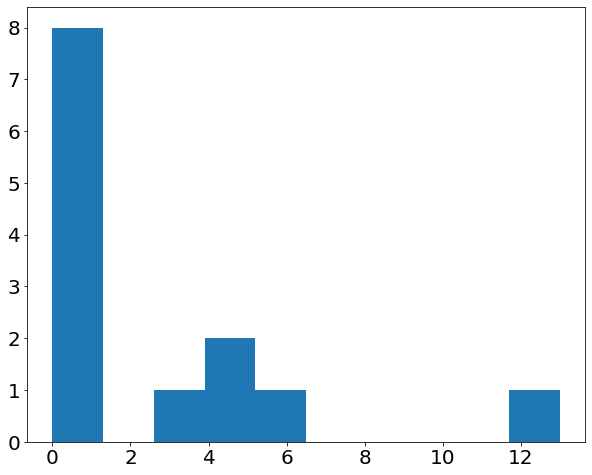

In [62]:
plt.hist(degree_histogram(ws))

(array([ 4.,  0.,  4.,  0.,  0., 13.,  0.,  6.,  0.,  3.]),
 array([ 8. ,  8.4,  8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. ]),
 <a list of 10 Patch objects>)

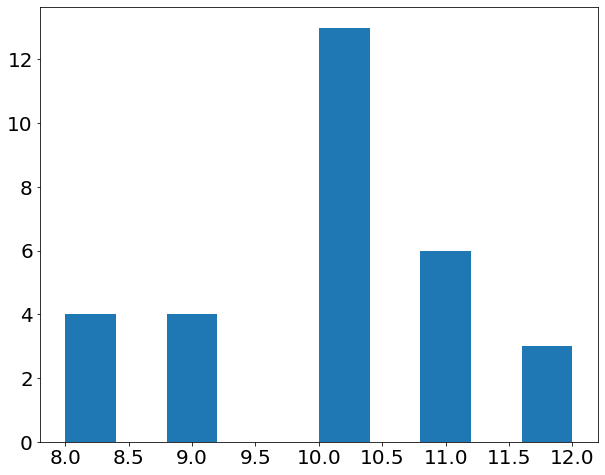

In [64]:
plt.hist(D)

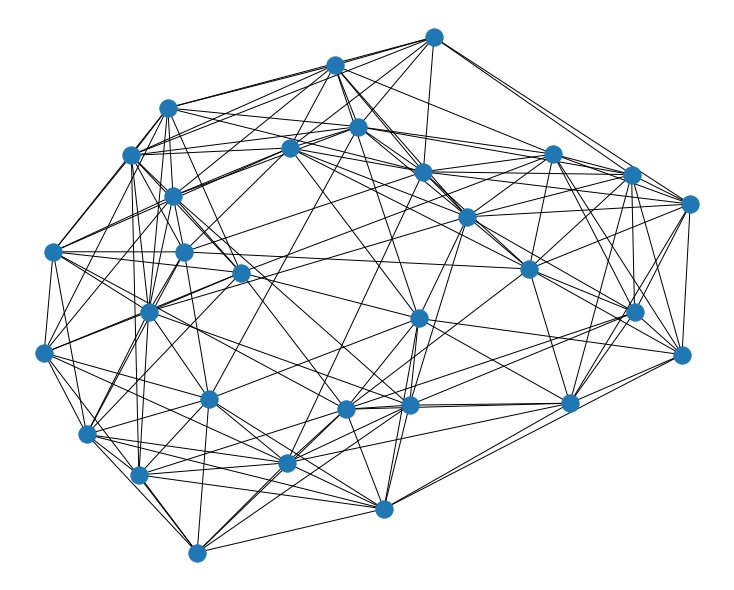

In [65]:
nx.draw(ws)

# TheBarabasi-Albertwork(https://arxiv.org/abs/cond-mat/9910332)

- showed that preferential attachment and growth are some elements that can produce scale-free networks. This model has the small worls property, but is still a random network with very small clustering.


In [55]:
ba=nx.barabasi_albert_graph(100,5)
D, C = degree_and_clustering(ba)

(array([31.,  3.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  1.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

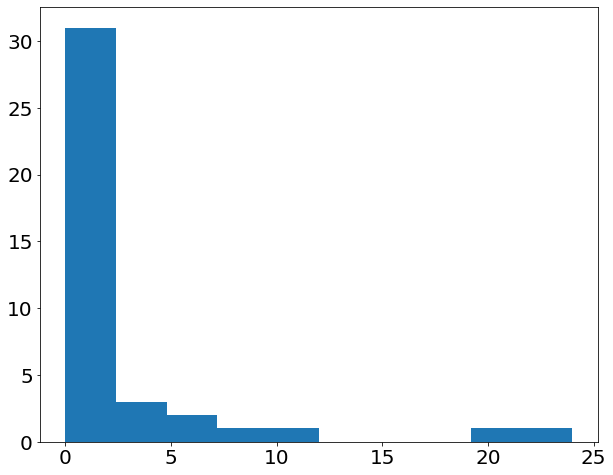

In [56]:
plt.hist(degree_histogram(ba))

(array([ 9.,  9., 30., 14., 16., 10.,  2.,  0.,  7.,  3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 <a list of 10 Patch objects>)

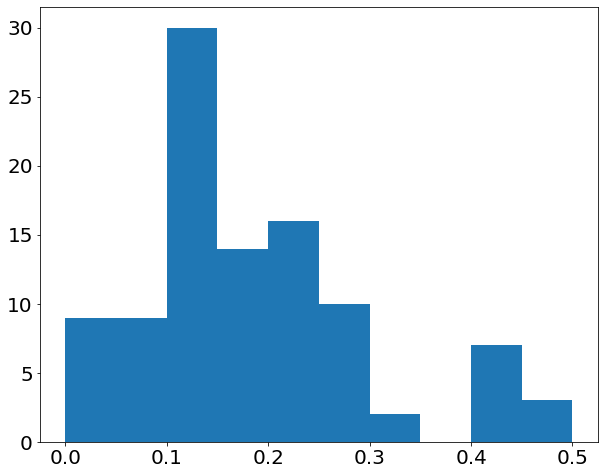

In [57]:
plt.hist(C)

(array([62., 18.,  7.,  2.,  4.,  3.,  2.,  1.,  0.,  1.]),
 array([ 5. ,  8.4, 11.8, 15.2, 18.6, 22. , 25.4, 28.8, 32.2, 35.6, 39. ]),
 <a list of 10 Patch objects>)

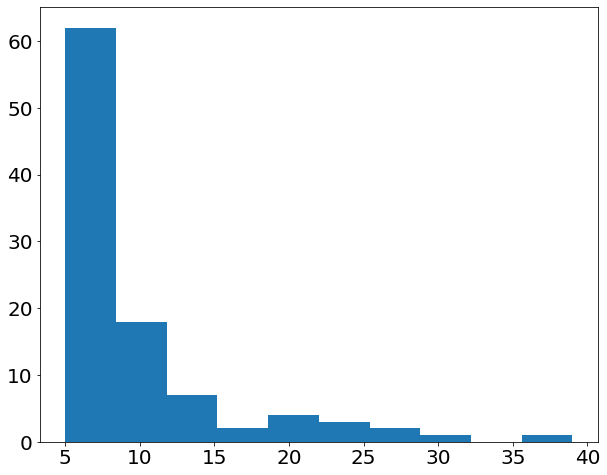

In [59]:
plt.hist(D)

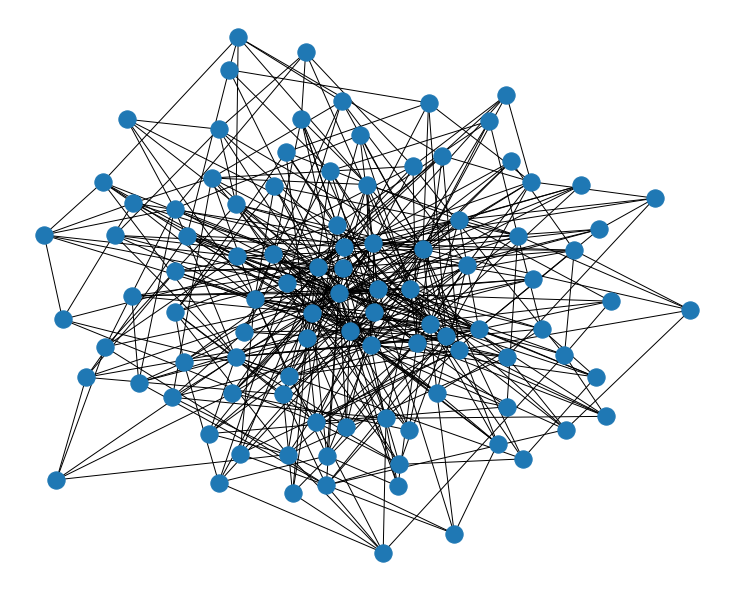

In [60]:
nx.draw(ba)

# Build a network 

In [68]:
import random
def coin_flip(ptrue):
    test = random.uniform(0.0,1.0)
    if ptrue == 0:
        out = False
    elif test < ptrue:
        out = True
    else:
        out = False
    return out

def build_network(interactions, population, chaos = 0.001):
    G = nx.Graph()
    G.add_nodes_from(range(population))
    nodes_list = list(G.nodes())
    edge_set = set()
    top_row = 0
    for node_1 in nodes_list:
        top_row += 1
        for node_2 in range(top_row):
            if (G.degree(node_2) < interactions) and (G.degree(node_1) < interactions):
                edge = (node_1, node_2)
                if ((edge[0],edge[1])) and ((edge[1],edge[0])) not in edge_set:
                    if not coin_flip(chaos):
                        G.add_edge(*edge)
                        edge_set.add(edge)
            else:
                if coin_flip(chaos):
                    edge = (node_1, node_2)
                    if ((edge[0],edge[1])) and ((edge[1],edge[0])) not in edge_set:
                        G.add_edge(*edge)
                        edge_set.add(edge)
    return G

In [79]:
g = build_network(interactions=20, population=100, chaos = 1)

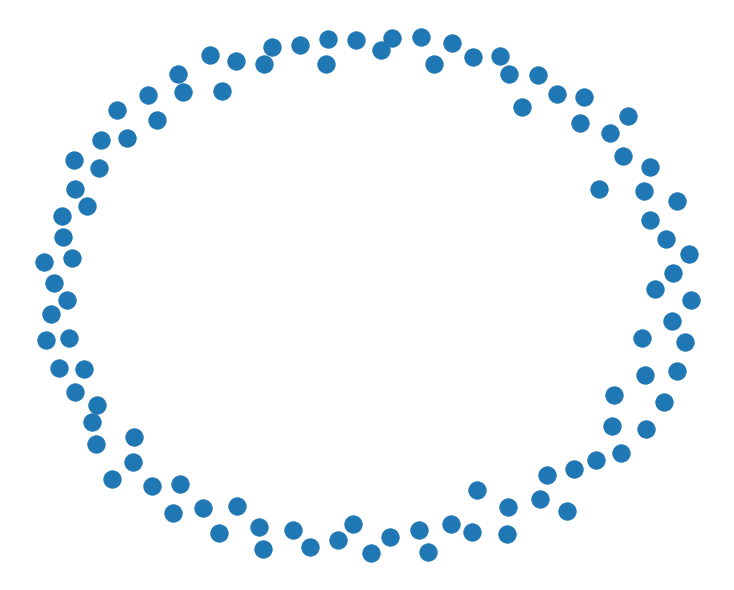

In [80]:
nx.draw(g)

In [326]:
G = nx.erdos_renyi_graph(20000,0.002)
D = np.array([degree(G,n) for n in nodes(G)])
print(np.mean(D))

39.9542


In [327]:
len(G)

20000

# Mesa example

In [102]:
from mesa import Model, Agent
from mesa.time import RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector


In [328]:
def number_of_infected(model):
    a =[agent for agent in model.schedule.agents if agent.kind=='I']
    return len(a)


def number_of_susceptible(model):
    a =[agent for agent in model.schedule.agents if agent.kind=='S']
    return len(a)


def number_of_recovered(model):
    a =[agent for agent in model.schedule.agents if agent.kind=='R']
    return len(a)


def number_of_exposed(model):
    a =[agent for agent in model.schedule.agents if agent.kind=='E']
    return len(a)

def in_range(x, xmin, xmax):
    if x >= xmin and x < xmax:
        return True
    else:
        return False

def get_time(t_dist, t_mean):
    if t_dist == 'E':
        #print(f'throw exp  scale ={t_mean}')
        return expon.rvs(scale=t_mean)
    elif t_dist == 'G':
        return gamma.rvs(a=t_mean, scale=1.0)
    else:
        return t_mean

def build_ed_network(turtles=20000, k=0.002):
    G = nx.erdos_renyi_graph(20000,0.002)
    D = np.array([degree(G,n) for n in nodes(G)])
    n = np.mean(D)
    print(f' mean number of neighbors ={n}')
    return G, n
    
class BarrioTortugaNX(Model):
    """A simple model of  epidemics using networx.

    The parameters are:
        turtles: the number of agents in the simulation.
        i0     : the initial number of infected agents.
        r0     : basic reproductive number
        p      : transmission probability per contact
        ti     : incubation time
        tr     : recovery time = duration of infectiouness.


        Model calibration. R0 can be written as:

        R0 = c x p x ti

        where:
           c is the average number of contacts per unit time
           c = nc x N /a

           p is the transmission probability per contact
           ti is the duration of the infection (the time the turtle is in the I category)

       Two quantities can be taken as known, R0 and ti. Then one can determine p as:
           p = R0 /(c * ti)

        Stochastic behaviour can be introduced in:
        1) ti and tr, which can be chosen to be either gamma or exponentially distributed
        2) p, via R0, which can be chosen to be either negative binomial or Poisson.

    """


    def __init__(self,
                 G,
                 neighbors,
                 ticks_per_day =    5, 
                 i0            =   10,
                 r0            =    3.5,
                 ti            =    5.5,
                 tr            =    6.5,
                 ti_dist       =    'F',    # F for fixed, E for exp G for Gamma
                 tr_dist       =    'F',
                 p_dist        =    'F',    # F for fixed, S for Binomial, P for Poissoin
                 ):


        # define grid and schedule
        self.ticks_per_day = ticks_per_day
        
        self.grid = NetworkGrid(G)
        self.schedule = RandomActivation(self)
        

        self.turtles  = len(G)
        self.i0       = i0
        self.r0       = r0
        self.nc         = neighbors

        # counters
        self.P        = []
        self.Ti       = []
        self.Tr       = []

        # distribution types
        self.ti_dist = ti_dist
        self.tr_dist = tr_dist
        self.p_dist  = p_dist

        self.ti = ti
        self.tr = tr

        # Prob
        self.k = 1
        if   self.p_dist == 'S':
            self.k  = 0.16
        elif self.p_dist == 'P':
            self.k = 1e+4

        # infection probability for fixed case
        self.p   = self.r0 /(self.nc * self.tr * self.ticks_per_day)

        if print_level(prtl, PrtLvl.Concise):
            print(f""" Simulation Parameters:

            General
                number of turtles       = {self.turtles}
                initial infected        = {self.i0}
                ticks per day           = {self.ticks_per_day}

            Control of stochastics

                ti_dist = {ti_dist}
                tr_dist = {tr_dist}
                p_dist =  {ti_dist}

            Average parameters controlling t and prob

                ti     =  {self.ti}
                tr     =  {self.tr}
                k      =  {self.k}
                r0     =  {self.r0}
                nc     =  {self.nc}
                p      =  {self.p}

            """)

        self.datacollector          = DataCollector(
        model_reporters             = {"NumberOfInfected": number_of_infected,
                                           "NumberOfSusceptible": number_of_susceptible,
                                           "NumberOfRecovered": number_of_recovered,
                                           "NumberOfExposed": number_of_exposed}
            )


        # Create turtles
        ss = self.turtles - i0            # number of susceptibles
        A = ss * ['S'] + i0 * ['I']
        np.random.shuffle(A)              # in random order

        for i, at in enumerate(A):
            ti = get_time(self.ti_dist, self.ti)
            tr = get_time(self.tr_dist, self.tr)
            p  = self.get_prob()
            self.Ti.append(ti)
            self.Tr.append(tr)
            self.P.append(p)

            if print_level(prtl, PrtLvl.Concise):
                if i < 5:
                    print (f' creating turtle number {i} with ti = {ti}, tr = {tr}, p ={p:.2e}')

            if at == 'I':
                if print_level(prtl, PrtLvl.Concise):
                    if i < 5:
                        print (f' creating I turtle')

                a = NXTurtle(i,  'I',
                                   ti * ticks_per_day,
                                   tr * ticks_per_day, p,
                                   self)

            else:
                if print_level(prtl, PrtLvl.Concise):
                    if i < 5:
                        print (f' creating S turtle')

                a = NXTurtle(i,  'S',
                                   ti * ticks_per_day,
                                   tr * ticks_per_day, p,
                                   self)

            self.schedule.add(a)              # add to schedule
            self.grid.place_agent(a, i)       # added to grid

        self.running = True
        self.datacollector.collect(self)


    def get_prob(self):
        if self.p_dist == 'S' or self.p_dist == 'P':
            r0  = c19_nbinom_rvs(self.r0, self.k) # self.k decided which one
            p   = r0 /(self.nc * self.tr * self.ticks_per_day)
        else:
            p = self.p
        return p


    def step(self):
        self.schedule.step()               # step all turtles
        self.datacollector.collect(self)



class NXTurtle(Agent):
    '''
    Class implementing a SEIR turtle living in a network

    '''

    def __init__(self, node, kind, ti, tr, prob, model):
        '''
        grid: The MultiGrid object in which the agent lives.
        x: The agent's current x coordinate
        y: The agent's current y coordinate
        stochastic: If false mean average
        '''
        super().__init__(node, model)
        self.pos   = node
        self.p    = prob
        self.kind = kind
        self.ti   = ti           # equals model average for now throw dist later
        self.tr   = tr           # equals model average for now throw dist later
        self.il   = 0            # counter tick
        self.iil  = 0           # infection length
        self.iel  = 0           # infection length


    def step(self):
        self.il+=1
        # Turtle became exposed with tag self.iel (see infect ())
        if self.kind == 'E' :
        #and self.model.schedule.steps > self.iel:

            if print_level(prtl, PrtLvl.Detailed):
                    print(f"""Found exposed with tag = {self.iel}
                          global time = {self.model.schedule.steps}
                          turtle id   = {self.unique_id}
                """)

            # When time is larger than incubation time, become infected
            if self.model.schedule.steps - self.iel > self.ti :
                self.iil = self.model.schedule.steps
                self.kind = 'I'

                if print_level(prtl, PrtLvl.Detailed):
                    print(f"""Turning E into I with tag = {self.iil}
                          global time = {self.model.schedule.steps}
                          turtle id   = {self.unique_id}
                """)

        elif self.kind == 'I':
            if print_level(prtl, PrtLvl.Detailed):
                print(f"""Found Infected with tag = {self.iil}
                          global time = {self.model.schedule.steps}
                          turtle id   = {self.unique_id}
                          **going to infect***
                """)
            self.infect()
            
            # When time is larger than recovery time, become recovered
            if self.model.schedule.steps - self.iil >  self.tr :
                self.kind = 'R'

                if print_level(prtl, PrtLvl.Detailed):
                    print(f"""Turning I into R with tag = {self.iil}
                          global time = {self.model.schedule.steps}
                          turtle id   = {self.unique_id}
                """)


    def infect(self):
        if print_level(prtl, PrtLvl.Verbose):
                print(f"""Now infecting with tags  {self.iil}
                          global time = {self.model.schedule.steps}
                          turtle id   = {self.unique_id}

                """)
        # array of coordinates ((x0,y0), (x1,y1), (x2, y2),...) of neighbors
        # last parameter True inludes own cell
        neighbors = self.model.grid.get_neighbors(self.pos)

        if print_level(prtl, PrtLvl.Verbose):
                print(f'neighbors  = {neighbors}')

        turtles = self.model.grid.get_cell_list_contents(neighbors)
        

        for turtle in turtles:  # loops over all turtles in cells
            if print_level(prtl, PrtLvl.Verbose):
                print(f'turtle  = {turtle}')

            if print_level(prtl, PrtLvl.Verbose):
                print(f' turtle kind = {turtle.kind}')

            if turtle.kind == 'S':  # if susceptible found try to infect
                if print_level(prtl, PrtLvl.Verbose):
                    print(f' throwing dice')

                if throw_dice(self.p):
                    if print_level(prtl, PrtLvl.Verbose):
                        print(f' Turtle becomes exposed')
                        
                    turtle.kind = 'E'
                    turtle.iel = self.model.schedule.steps # tag = infection time

                    if print_level(prtl, PrtLvl.Detailed):
                        print(f' **TURNING TURTLE INTO E ** ')
                        print(f"""tag  {turtle.iel}
                                  global time = {self.model.schedule.steps}
                                  turtle id   = {turtle.unique_id}

                        """)



In [329]:
prtl=PrtLvl.Concise

In [330]:
G, n = build_ed_network(turtles=20000, k=0.002)

 mean number of neighbors =39.9858


In [331]:
bt = BarrioTortugaNX(G,
                     n,
                     ticks_per_day  = 5,
                     i0             = 3,
                     r0             = 3.5,
                     ti             = 5.5,
                     tr             =  6.5,
                     ti_dist        = 'F',    # F for fixed, E for exp G for Gamma
                     tr_dist        = 'F',
                     p_dist         = 'F',)


 Simulation Parameters:

            General
                number of turtles       = 20000
                initial infected        = 3
                ticks per day           = 5

            Control of stochastics

                ti_dist = F
                tr_dist = F
                p_dist =  F

            Average parameters controlling t and prob

                ti     =  5.5
                tr     =  6.5
                k      =  1
                r0     =  3.5
                nc     =  39.9858
                p      =  0.0026932638009570325

            
 creating turtle number 0 with ti = 5.5, tr = 6.5, p =2.69e-03
 creating S turtle
 creating turtle number 1 with ti = 5.5, tr = 6.5, p =2.69e-03
 creating S turtle
 creating turtle number 2 with ti = 5.5, tr = 6.5, p =2.69e-03
 creating S turtle
 creating turtle number 3 with ti = 5.5, tr = 6.5, p =2.69e-03
 creating S turtle
 creating turtle number 4 with ti = 5.5, tr = 6.5, p =2.69e-03
 creating S turtle


In [332]:
steps = 500
fprint = 25

In [333]:
for i in range(steps):
    if i%fprint == 0:
        print(f' step {i}')
    bt.step()
print('Done!')

 step 0
 step 25
 step 50
 step 75
 step 100
 step 125
 step 150
 step 175
 step 200
 step 225
 step 250
 step 275
 step 300
 step 325
 step 350
 step 375
 step 400
 step 425
 step 450
 step 475
Done!


In [334]:
df = bt.datacollector.get_model_vars_dataframe()

In [335]:
df

,NumberOfInfected,NumberOfSusceptible,NumberOfRecovered,NumberOfExposed
0,3,19997,0,0
1,3,19997,0,0
2,3,19996,0,1
3,3,19996,0,1
4,3,19996,0,1
5,3,19996,0,1
6,3,19996,0,1
7,3,19996,0,1
8,3,19996,0,1
9,3,19996,0,1


In [336]:
df.index

RangeIndex(start=0, stop=501, step=1)

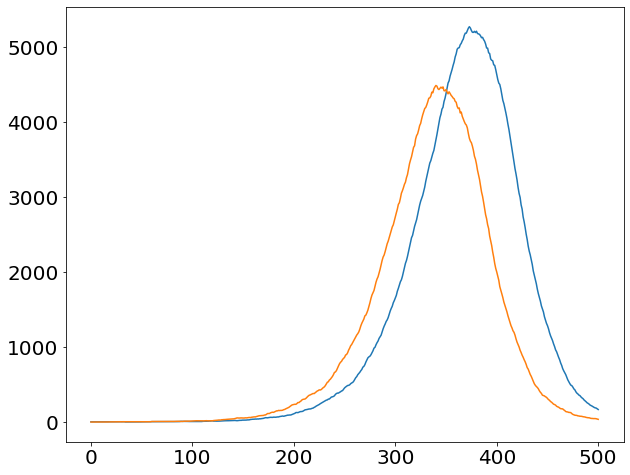

In [337]:
plt.plot(df.index, df.NumberOfInfected)
plt.plot(df.index, df.NumberOfExposed)

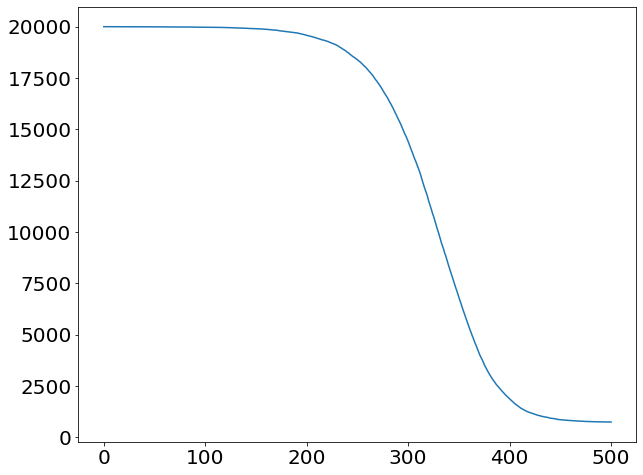

In [338]:
plt.plot(df.index, df.NumberOfSusceptible)

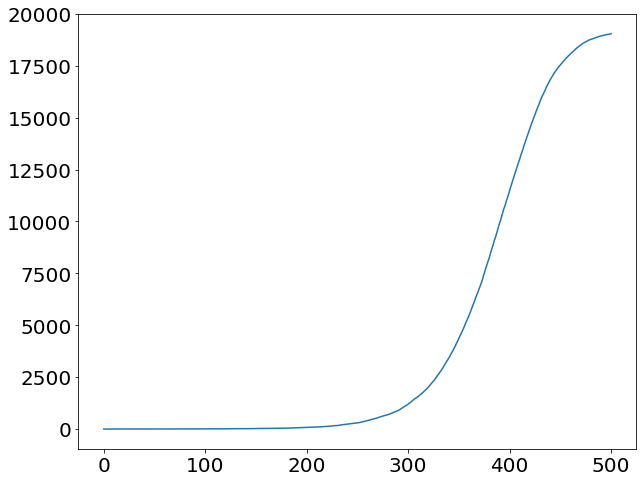

In [339]:
plt.plot(df.index, df.NumberOfRecovered)

In [6]:
print("node degree clustering")
for v in nodes(G):
    print('%s %d %f' % (v,degree(G,v),clustering(G,v)))

node degree clustering
0 2 0.000000
1 4 0.333333
2 4 0.666667
3 3 0.666667
4 5 0.400000
5 4 0.666667
6 8 0.357143
7 4 0.666667
8 3 0.666667
9 3 0.333333


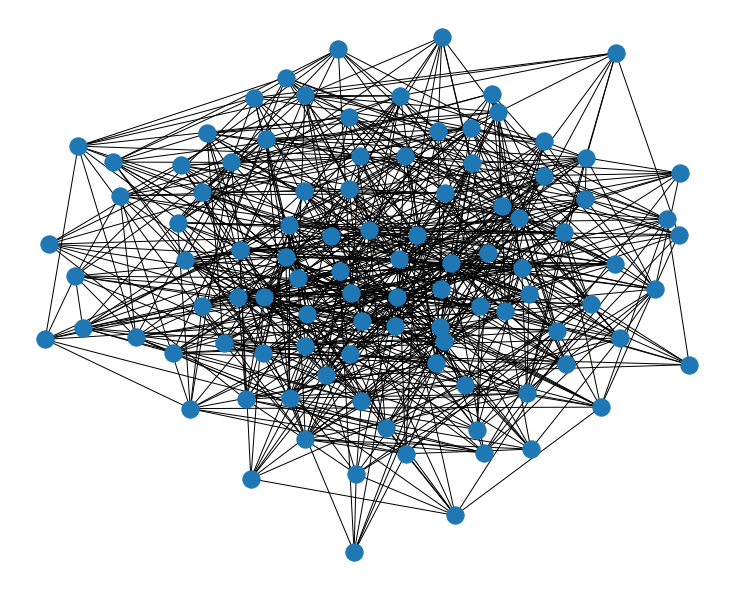

In [30]:
nx.draw(er)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

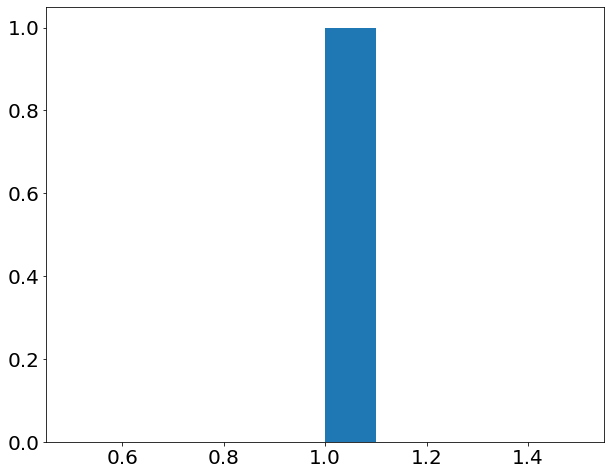

In [12]:
plt.hist(degree(G,v))